In [1]:
pip install random-word


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#printing a string with random words

from random_word import RandomWords
r = RandomWords()

# Return a single random word
n=10
s =""
for i in range(0,n):
    s = s+" "+ r.get_random_word()
print(s)


 stubbliest thowt chemins farmery bandwagons concretism ophthalmophthisis martyring xanthoconite follis


In [5]:
#RSA
import rsa
import numpy as np
import pandas as pd
from random_word import RandomWords
#pd.set_option('display.max_colwidth',None)
#pd.set_option('display.max_rows',None)
r = RandomWords()
no=10

dataset = []
c=1
for i in range(0,20):
    difference_files =[] 
    s =""
    for i in range(0,no):
        s = s+" "+ r.get_random_word()
    # Generate public and private keys
    publicKey, privateKey = rsa.newkeys(2048)
    
    # Encrypt the message
    encMessage = rsa.encrypt(s.encode(), publicKey)
    print(
    # Print the original and decrypted messages
    print("Original string:", s)
    # difference_files.append(s)
    # difference_files.append("RSA")
    
    # Convert the encrypted message to a hexadecimal matrix
    hex_string = encMessage.hex()
    # difference_files.append(hex_string)
    hex_matrix = [hex_string[i:i+2].upper() for i in range(0, len(hex_string), 2)]
    
    # Format the hex matrix into an 8x8 structure
    hex_matrix = [hex_matrix[i:i+8] for i in range(0, len(hex_matrix), 8)]
    for row in hex_matrix:
        print(row)
    n = len(hex_matrix)
    print("length:",n)
    
    difference_files.append(s)
    difference_files.append("RSA")
    difference_files.append(hex_string)
    
    for i in range(0,n-1):
        xor_result = []
        difference_file_n=[]
        for i in range(len(hex_matrix) - 1):
            row_xor = [hex(int(hex_matrix[i][j], 16) ^ int(hex_matrix[i+1][j], 16))[2:].upper().zfill(2)
                       for j in range(len(hex_matrix[i]))]
            xor_result.append(row_xor)
        difference_file_n.append(xor_result)
        hex_matrix = xor_result
        difference_files.append(difference_file_n)
    dataset.append(difference_files)
df1 = pd.DataFrame(dataset)
df1.to_csv(f'rsa_output.csv',index=False)
c = c+1



Original string:  scoury phonon proletariate riggers manysidedness astringed neurosurgeon embruting haunters autoheterodyne
['03', 'F0', '95', 'A3', '80', '09', 'EB', '59']
['07', '8A', '1F', '8A', 'E7', '1E', '21', '65']
['49', 'EF', '1D', '7E', 'F1', '49', '04', 'BB']
['B9', '65', '48', '2C', '65', 'AE', 'CE', '37']
['62', '3D', 'BE', 'EA', '44', '81', '5B', '73']
['02', '5F', 'E9', '0B', 'C8', '6B', '82', '49']
['0A', '33', 'FD', 'D9', '67', '89', '54', '74']
['B5', '5F', '3E', '2D', '1D', '4C', 'BA', '9F']
['40', '56', '6C', '08', '4A', '38', '90', '00']
['D0', '3A', '8C', '6D', '1B', 'AA', '31', 'DC']
['87', 'BE', 'D0', '7D', '37', '28', '54', '6B']
['53', '39', 'C9', 'D9', '9F', '63', '37', '43']
['E1', '54', '11', '51', 'FE', 'EF', '23', '6B']
['0F', '86', '6F', 'B8', 'B7', 'D7', 'BA', 'F6']
['FE', 'E5', '34', '16', 'F9', 'A1', '06', 'C6']
['78', 'DF', '61', 'E6', '79', 'F7', '48', '23']
['05', '25', '5F', '01', '5F', '0B', '72', '8D']
['77', 'A0', '52', '69', 'EE', '84', 'B0', 

In [6]:
#AES
import numpy as np
import pandas as pd
from random_word import RandomWords
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

r = RandomWords()
no = 30  # Number of words in the plaintext

dataset = []
c = 1
for i in range(0, 20):
    difference_files = [] 
    s = ""
    for _ in range(0, no):
        s = s + " " + r.get_random_word()

    # Generate AES key
    aes_key = get_random_bytes(16)
    cipher = AES.new(aes_key, AES.MODE_CBC)
    cipher_text = cipher.encrypt(pad(s.encode(), AES.block_size))
    iv = cipher.iv

    # Print the original string
    print("Original string:", s)

    # Convert the encrypted message to a hexadecimal string
    hex_string = cipher_text.hex()

    # Ensure that the hex string is long enough for 32 rows
    total_hex_chars = 32 * 8 * 2  # 32 rows * 8 bytes * 2 characters per byte
    if len(hex_string) < total_hex_chars:
        hex_string = hex_string.ljust(total_hex_chars, '0')  # Pad the hex string with '0' if it's too short

    # Convert the hex string to a matrix of 8x8 structure
    hex_matrix = [hex_string[i:i + 2].upper() for i in range(0, len(hex_string), 2)]

    # Ensure the matrix has exactly 32 rows
    hex_matrix = [hex_matrix[i:i + 8] for i in range(0, len(hex_matrix), 8)]
    
    # If there are more than 32 rows, trim it to 32 rows
    if len(hex_matrix) > 32:
        hex_matrix = hex_matrix[:32]

    # Print the hex matrix
    for row in hex_matrix:
        print(row)
    
    # Ensure the length is exactly 32 rows
    n = len(hex_matrix)
    print("Length:", n)

    # Store the original string, encryption method, and hex string in the difference files
    difference_files.append(s)
    difference_files.append("AES")
    difference_files.append(hex_string)

    # XOR the rows (if more than one row exists) and store the results
    for i in range(0, n - 1):
        xor_result = []
        difference_file_n = []
        for i in range(len(hex_matrix) - 1):
            row_xor = [
                hex(int(hex_matrix[i][j], 16) ^ int(hex_matrix[i+1][j], 16))[2:].upper().zfill(2)
                for j in range(len(hex_matrix[i]))
            ]
            xor_result.append(row_xor)
        difference_file_n.append(xor_result)
        hex_matrix = xor_result
        difference_files.append(difference_file_n)
    
    dataset.append(difference_files)

# Save the dataset to a CSV file
df1 = pd.DataFrame(dataset)
df1.to_csv(f'aes_output.csv', index=False)


Original string:  hayers inamissible replaceability klister colonizable unfarcical reaper kaolinate hasidean goldeyes aptotic cerniture celioelytrotomy checksum rifampin superchivalrousness cameralism insp saturation neatify supereminent hellicat expositoriness cork unpoised palpates agria asserve glaucophane cancelation
['DA', 'BD', 'B8', '86', '3B', 'E9', '62', '56']
['64', 'CF', 'E8', '8E', '3A', '47', 'D3', 'A3']
['D9', 'CE', 'B0', '68', '85', '00', '6B', '66']
['E9', '39', 'D7', '23', '8B', 'B7', '39', '6B']
['B3', '51', '4F', '05', '89', '58', '9B', 'DB']
['5E', '92', 'A8', 'FB', 'AB', 'D3', 'C1', '38']
['31', '80', '69', '74', '8F', 'E1', 'FF', '67']
['32', '43', '3E', '16', 'C5', 'CB', '7A', 'C3']
['F3', 'B9', '4F', '27', 'D9', 'ED', '4C', '22']
['40', 'A4', '53', 'A3', '6B', '59', '70', '87']
['5E', 'D9', '5A', '68', 'E9', 'EE', '99', '73']
['DD', '20', '5B', '79', 'AE', '4B', '30', '58']
['43', '0A', '1B', '5B', '31', '74', 'A2', 'E6']
['7A', 'F0', '82', 'B4', '6D', '09', 'EE

In [5]:
#Blowfish
import numpy as np
import pandas as pd
from random_word import RandomWords
from Crypto.Cipher import Blowfish
from struct import pack
from random_word import RandomWords
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

#pd.set_option('display.max_colwidth',None)
#pd.set_option('display.max_rows',None)
r = RandomWords()
no=10

dataset = []
c=1
for i in range(0,20):
    difference_files =[] 
    s =""
    for i in range(0,no):
        s = s+" "+ r.get_random_word()
    bs = Blowfish.block_size
    key = b'an arbitrarily long key'
    cipher = Blowfish.new(key, Blowfish.MODE_CBC)
    
    # Generate random words as plaintext, ensuring the length will provide enough ciphertext
    s = " ".join(r.get_random_word() for _ in range(30))  # Increased word count to ensure sufficient length
    plaintext = str.encode(s)
    
    # Calculate the padding length to make the plaintext a multiple of block size (8 bytes)
    padding_length = bs - (len(plaintext) % bs)
    padding = pack('B' * padding_length, *([padding_length] * padding_length))  # Padding with PKCS5/PKCS7
    plaintext += padding
    
    # Encrypt the plaintext
    msg = cipher.iv + cipher.encrypt(plaintext)
    
    # Convert the encrypted message to a hex matrix
    hex_string = msg.hex().upper()
    hex_pairs = [hex_string[i:i + 2] for i in range(0, len(hex_string), 2)]  # Create pairs of 2 characters
    
    # Ensure there are exactly 32 rows, each with 8 elements
    hex_matrix = [hex_pairs[i:i + 8] for i in range(0, len(hex_pairs), 8)]
    hex_matrix = hex_matrix[:32]  # Truncate or pad to get exactly 32 rows
    
    # Print the matrix
    for row in hex_matrix:
        print(row)
    
    # Print the length of the matrix
    print("Length:", len(hex_matrix)) 
   
    
    
    difference_files.append(s)
    difference_files.append("blowfish")
    difference_files.append(hex_string)
    
    for i in range(0,n-1):
        xor_result = []
        difference_file_n=[]
        for i in range(len(hex_matrix) - 1):
            row_xor = [hex(int(hex_matrix[i][j], 16) ^ int(hex_matrix[i+1][j], 16))[2:].upper().zfill(2)
                       for j in range(len(hex_matrix[i]))]
            xor_result.append(row_xor)
        difference_file_n.append(xor_result)
        hex_matrix = xor_result
        difference_files.append(difference_file_n)
    dataset.append(difference_files)
df1 = pd.DataFrame(dataset)
df1.to_csv(f'blowfish_output.csv',index=False)
c = c+1

['C8', 'BB', '99', '20', '64', '66', '1B', '9D']
['BB', '86', '8F', '5F', 'D0', '23', 'D1', 'CE']
['2B', 'C0', '3E', '1D', '40', '13', 'BF', 'BE']
['DB', '75', '20', '81', 'FE', '6D', 'A7', 'E2']
['DB', '7B', 'F1', '90', 'F1', '63', 'EF', 'B1']
['40', 'EA', '8E', '1B', 'CC', 'BF', 'F3', '07']
['44', 'AF', '06', '61', '97', '17', 'D3', 'EF']
['D5', 'A9', '23', '8F', '18', '39', '88', '2D']
['D7', '16', '87', '77', 'D1', '3D', '67', '92']
['96', '5F', '42', 'B6', 'E9', 'CC', 'D4', '40']
['EB', 'EB', '3B', '8A', 'AF', '6E', '24', '75']
['D9', '38', 'AD', '61', 'B7', '84', '64', '7A']
['E9', '8F', 'CD', '34', '32', '28', 'C8', 'AA']
['FF', '36', 'D5', 'A6', '86', '52', 'F4', '81']
['E5', '71', 'F5', 'E5', 'EE', 'EB', '73', '7B']
['43', '4F', '13', 'CC', 'D9', '4F', 'B1', 'C8']
['69', '47', '32', '48', 'D8', 'DA', '6C', 'B7']
['5C', '49', '9B', '5B', 'F2', '08', '94', '76']
['60', 'C9', 'DC', 'BE', '29', '3A', '48', '55']
['3F', 'B8', '7E', 'AF', '5F', '53', 'DC', '53']
['7E', 'EF', 'FA', '

In [9]:
#DES
import numpy as np
import pandas as pd
from random_word import RandomWords
from Crypto.Cipher import DES3
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

#pd.set_option('display.max_colwidth',None)
#pd.set_option('display.max_rows',None)
r = RandomWords()
no=10

dataset = []
c=1
for i in range(0,20):
    difference_files =[] 
    s =""
    for i in range(0,no):
        s = s+" "+ r.get_random_word()
    key = b"mysecurekey123456"  # Key (must be 16 or 24 bytes long)
    while len(key) < 24:
        key +=b' '# Padding key to 24 bytes
    key = key[:24]
    cipher = DES3.new(key, DES3.MODE_CBC)  # Using CBC mode
    iv = cipher.iv  # Initialization vector

    target_plaintext_length = 240  # 256 (rows) - 8 (IV)
    plaintext = s.encode()
    while len(plaintext) < target_plaintext_length:
        plaintext += b" "
        
    plaintext_padded = pad(plaintext, DES3.block_size)  # Pad plaintext to match block size
    ciphertext = cipher.encrypt(plaintext_padded)
    hex_string = (iv + ciphertext).hex()
    # Print the original and decrypted messages
    print("Original string:", s)

    
    # Convert the encrypted message to a hexadecimal matrix
    #hex_string = encMessage.hex()
    # difference_files.append(hex_string)
    hex_matrix = [hex_string[i:i+2].upper() for i in range(0, len(hex_string), 2)]
     # Format the hex matrix into an 8x8 structure
    hex_matrix = [hex_matrix[i:i+8] for i in range(0, len(hex_matrix), 8)]
    for row in hex_matrix:
        print(row)
    n = len(hex_matrix)
    print("length:",n)
    
    difference_files.append(s)
    difference_files.append("DES3")
    difference_files.append(hex_string)
    
    for i in range(0,n-1):
        xor_result = []
        difference_file_n=[]
        for i in range(len(hex_matrix) - 1):
            row_xor = [hex(int(hex_matrix[i][j], 16) ^ int(hex_matrix[i+1][j], 16))[2:].upper().zfill(2)
                       for j in range(len(hex_matrix[i]))]
            xor_result.append(row_xor)
        difference_file_n.append(xor_result)
        hex_matrix = xor_result
        difference_files.append(difference_file_n)
    dataset.append(difference_files)
df1 = pd.DataFrame(dataset)
df1.to_csv(f'des3_output.csv',index=False)
c = c+1

Original string:  amylo yellowstone cuneoscaphoid nonmonogamously unseaworthy sooterkin phanotron hypoproteinemia lissom rehinges
['C0', '36', '6F', '6C', '67', '54', '73', 'E2']
['B1', '72', '08', '25', '9C', '4B', '72', 'F9']
['B5', '0F', 'A4', 'ED', '59', 'A9', 'A0', 'D3']
['5F', '02', '11', '24', 'EA', 'E4', '17', '79']
['3E', '2D', 'EA', '3C', '8F', '5A', '04', 'BF']
['6F', '3A', 'BD', '73', '91', '0C', '8A', '21']
['24', '69', '1A', 'F7', 'BD', 'E2', '56', '00']
['33', '8B', '91', 'DB', '07', '9E', '51', '45']
['92', 'C1', 'B7', 'FD', '0C', '2A', '9D', 'CA']
['9A', '87', 'B9', 'E8', 'E8', '12', '50', '32']
['5A', 'DA', '86', '32', '75', '3C', 'A8', '4E']
['FE', '36', 'E9', 'AA', 'FA', '6D', '0F', 'C3']
['55', 'EC', '35', '1D', '41', '39', 'F7', '47']
['26', '7D', 'D6', '96', 'CE', '2A', '08', '75']
['37', '78', '87', 'C4', '9F', 'B3', '58', 'E3']
['84', '0C', 'FA', 'F8', '7E', '50', '91', 'DE']
['AE', '31', 'DC', 'BA', '64', 'B1', 'FB', '6B']
['F7', 'C8', 'CB', 'A9', '3B', '97', 

In [8]:
#rc4
import numpy as np
import pandas as pd
from random_word import RandomWords
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from Crypto.Cipher import ARC4
from Crypto.Hash import SHA256, HMAC
from Crypto.Random import get_random_bytes

#pd.set_option('display.max_colwidth',None)
#pd.set_option('display.max_rows',None)
r = RandomWords()
no=10

dataset = []
c=1
for i in range(0,20):
    difference_files =[] 
    s =""
    for i in range(0,no):
        s = s+" "+ r.get_random_word()

    # Initialize the key and nonce
    key = b'Very long and confidential key'
    nonce = get_random_bytes(16)
    
    original_string = s
    
    # Generate the temporary key using HMAC and SHA256
    tempkey = HMAC.new(key, nonce, digestmod=SHA256).digest()
    
    # Initialize the ARC4 cipher with the temp key
    cipher = ARC4.new(tempkey)
    
    # Encrypt the adjusted message
    msg = nonce + cipher.encrypt(original_string.encode())
    
    # Print the encrypted message in hexadecimal format
    print(msg.hex())
    
    # Convert the encrypted message to a hexadecimal string
    hex_string = msg.hex()
    
    # Ensure the hex string is long enough to create a 32x8 matrix
    total_hex_chars = 32 * 8 * 2  # 32 rows * 8 bytes * 2 hex characters per byte
    if len(hex_string) < total_hex_chars:
        # Increase the original string length if necessary
        additional_string_length = (total_hex_chars - len(hex_string)) // 2
        original_string += "A" * additional_string_length  # Pad with "A"s to meet the required length
    
        # Re-encrypt the newly adjusted string
        msg = nonce + cipher.encrypt(original_string.encode())
        hex_string = msg.hex()
    
    # Convert the hex string to a list of individual hex characters
    hex_matrix = [hex_string[i:i + 2].upper() for i in range(0, len(hex_string), 2)]
    
    # Convert the list of hex characters into a matrix of 8x8 structure (32 rows, each with 8 elements)
    hex_matrix = [hex_matrix[i:i + 8] for i in range(0, len(hex_matrix), 8)]
    
    # If the matrix has more than 32 rows, trim it to 32 rows
    if len(hex_matrix) > 32:
        hex_matrix = hex_matrix[:32]
    
    # If the matrix has fewer than 32 rows, pad it with '00' rows to ensure it has 32 rows
    while len(hex_matrix) < 32:
        hex_matrix.append(['00'] * 8)
    
    # Print the hex matrix
    for row in hex_matrix:
        print(row)
    
    # Ensure the length is exactly 32 rows
    n = len(hex_matrix)
    print("Length:", n)
    
    difference_files.append(s)
    difference_files.append("rc4")
    difference_files.append(hex_string)
    
    for i in range(0,n-1):
        xor_result = []
        difference_file_n=[]
        for i in range(len(hex_matrix) - 1):
            row_xor = [hex(int(hex_matrix[i][j], 16) ^ int(hex_matrix[i+1][j], 16))[2:].upper().zfill(2)
                       for j in range(len(hex_matrix[i]))]
            xor_result.append(row_xor)
        difference_file_n.append(xor_result)
        hex_matrix = xor_result
        difference_files.append(difference_file_n)
    dataset.append(difference_files)
df1 = pd.DataFrame(dataset)
df1.to_csv(f'rc4_output.csv',index=False)
c = c+1

466e5b2fdec5b8b1361e25b8591cfb8f69f26588450e96428e9763ea36f66fc8688eab7777319e81f66965decbba7be7818bf2d1c847f891eb2b4515782779b9a4fb89b4af3b24760ef46e9bd03ac5a4580f27fcccb9b7b82a6fc967b3105676ed2ec92984d265b9b88ad2aade65e57225ea7b265121445ced7de44769ad27118db8efb80d8e28
['46', '6E', '5B', '2F', 'DE', 'C5', 'B8', 'B1']
['36', '1E', '25', 'B8', '59', '1C', 'FB', '8F']
['E6', '54', '1E', '1A', '6B', '12', 'F7', 'BE']
['75', '45', 'C3', '01', 'D2', '63', 'C0', 'CD']
['D8', '0A', '98', '3F', '44', '72', '14', '41']
['DE', 'CD', '3B', '7F', 'D7', 'A7', '10', 'B5']
['21', '07', '07', '8D', '8D', '0F', 'BF', '42']
['EE', '5C', 'D9', '64', '9A', 'C6', '12', '5F']
['37', 'B7', '02', '23', 'B5', 'E9', '38', 'BC']
['B5', '4E', 'F2', 'CF', 'B5', '79', '86', 'EE']
['4E', '3C', '67', 'B0', '1A', '10', '88', '6F']
['06', '55', '89', 'E1', '9F', '19', '3B', '58']
['15', '4C', '74', '15', 'E4', 'EB', 'F7', '06']
['4A', 'BC', 'A9', 'B7', '48', 'C4', '48', '0E']
['8C', '7F', '94', '41', 'A7', '9E', 'F3', 

In [4]:
import rsa

publicKey, privateKey = rsa.newkeys(1024)

encMessage = rsa.encrypt(s.encode(), 
                         publicKey)

print("original string: ", s)
print("encrypted string: ", encMessage)

decMessage = rsa.decrypt(encMessage, privateKey).decode()

print("decrypted string: ", decMessage)



original string:   valetism grecomania umbrina physiotype testicardinate nonseismic songbooks peritrichous chetive subtotem
encrypted string:  b'sS\xc4#nslu\x9cc\x91\xe8\xaf\xe4v\xd4\x95iP\xf0\xcb\x99=\x19\x1b,\x9e\xeb\xfe\x80\xf7sq\x82P\xdd\x08\x08\x8c\x14D\x0cA\xa5R\x86\xefM\xd2\x8f\xf8\x0c#=S\xd4"\xd95+\xbe\x8b\xe0\x04:_\x1d\x9f\x80\xaezT;%\x16\x16\x9f\x1f\x8a=\xd5\xdc\x9f\xfd\xff9\xe0\xadb\xe6\xaaL\xdb\xd8j\xc9\n\x8e\x0f~\x19\xbcR\xcfA\xc8\xd8\x92\r:\xbat?7\xa4M\xbd\xee\x14\x14\xcc\xe3?g\xbd\n\n\xb8'
decrypted string:   valetism grecomania umbrina physiotype testicardinate nonseismic songbooks peritrichous chetive subtotem


In [5]:
x = "20 6d 69 6e 6b 73 20 64 796e616d6f6d6574657273206375616472696c6c65726f20636175646f63657068616c616420656c656374726f746865726d69632070686f746f74797069632073656d6965787465726e616c697a6564207365786f6c6f67696573207374756e74697374206d696e6e79"

# Print the type of 'x'
print(type(x))  # This will give <class 'str'>

# You can print the hex version of the content (in case of a string)
x_bytes = bytes.fromhex(x)
print(x_bytes)

print(hex(id(type(x))))

<class 'str'>
b' minks dynamometers cuadrillero caudocephalad electrothermic phototypic semiexternalized sexologies stuntist minny'
0x59539cc2c7c0


In [6]:
# Assuming 'hex_matrix' is the 2D list we created earlier

# Convert hex values to integers, perform XOR, then convert back to hex
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
difference_files =[]
difference_file_n=[]
hex_matrix = [
['AF', 'C2', '37', '1B', 'F4', '14', '7E', '4A'],
['5F', 'BE', '05', 'CD', '36', '55', '2A', '85'],
['AF', 'C2', '37', '1B', 'F4', '14', '7E', '4A'],
['5F', 'BE', '05', 'CD', '36', '55', '2A', '85'],
['5F', 'BE', '05', 'CD', '36', '55', '2A', '85'],
['5F', 'BE', '05', 'CD', '36', '55', '2A', '85'],
]
n = len(hex_matrix)
print("length:",n)

for i in range(0,n-1):
    xor_result = []
    for i in range(len(hex_matrix) - 1):
        row_xor = [hex(int(hex_matrix[i][j], 16) ^ int(hex_matrix[i+1][j], 16))[2:].upper().zfill(2)
                   for j in range(len(hex_matrix[i]))]
        xor_result.append(row_xor)
    difference_file_n.append(xor_result)
    hex_matrix = xor_result
difference_files.append(difference_file_n)
df1 = pd.DataFrame(difference_files)
print(df1)

length: 6
                                                                                                                                                                            0  \
0  [[F0, 7C, 32, D6, C2, 41, 54, CF], [F0, 7C, 32, D6, C2, 41, 54, CF], [F0, 7C, 32, D6, C2, 41, 54, CF], [00, 00, 00, 00, 00, 00, 00, 00], [00, 00, 00, 00, 00, 00, 00, 00]]   

                                                                                                                                          1  \
0  [[00, 00, 00, 00, 00, 00, 00, 00], [00, 00, 00, 00, 00, 00, 00, 00], [F0, 7C, 32, D6, C2, 41, 54, CF], [00, 00, 00, 00, 00, 00, 00, 00]]   

                                                                                                        2  \
0  [[00, 00, 00, 00, 00, 00, 00, 00], [F0, 7C, 32, D6, C2, 41, 54, CF], [F0, 7C, 32, D6, C2, 41, 54, CF]]   

                                                                      3  \
0  [[F0, 7C, 32, D6, C2, 41, 54, CF], [00, 00, 00, 00,

In [1]:
import os
import glob
import pandas as pd
os.chdir("/home/christina/final-project/v2/csv")

extension = 'csv'
all_filenames = []
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')


In [6]:
import pandas as pd
import numpy as np
import ast
# Read the data from CSV
df = pd.read_csv('/home/christina/final-project/v2/csv/aes_output.csv')

for k in range(3,33):
    path = "/home/christina/final-project/v2/csv/cluster_analysis/d"+str(k-2)
    os.chdir(path)
    # Extract the value from the specific column and convert it
    l = list(df[df.columns[k]])
    
    # Clean up the extra characters and convert to a list of lists
    cleaned_list = [ast.literal_eval(item) for item in l]
    for i in range(0,20):
        matrix = cleaned_list[i]
        matrix = np.array(matrix).flatten()
        print(matrix) 
        l=[]
        for j in range(len(matrix)):
            l1=[]
            decimal_value = int(matrix[j], 16)
            l1.append(j)
            l1.append(decimal_value)
            l.append(l1)
        
        df1 = pd.DataFrame(l)
        df1.to_csv(f'df{k-2}_aes_row{i}.csv',index=False)

['BE' '72' '50' '08' '01' 'AE' 'B1' 'F5' 'BD' '01' '58' 'E6' 'BF' '47'
 'B8' 'C5' '30' 'F7' '67' '4B' '0E' 'B7' '52' '0D' '5A' '68' '98' '26'
 '02' 'EF' 'A2' 'B0' 'ED' 'C3' 'E7' 'FE' '22' '8B' '5A' 'E3' '6F' '12'
 'C1' '8F' '24' '32' '3E' '5F' '03' 'C3' '57' '62' '4A' '2A' '85' 'A4'
 'C1' 'FA' '71' '31' '1C' '26' '36' 'E1' 'B3' '1D' '1C' '84' 'B2' 'B4'
 '3C' 'A5' '1E' '7D' '09' 'CB' '82' 'B7' 'E9' 'F4' '83' 'F9' '01' '11'
 '47' 'A5' 'A9' '2B' '9E' '2A' '40' '22' '9F' '3F' '92' 'BE' '39' 'FA'
 '99' 'EF' '5C' '7D' '4C' '51' 'C2' 'EE' 'E2' '77' 'F1' '57' '25' 'E0'
 '35' 'B6' '4C' '59' '4B' '40' '2D' '61' '69' '24' '57' '66' 'E6' '5D'
 'E2' '0B' '5E' '5F' '42' '05' 'A9' 'C4' '2D' '7C' '28' '55' '6F' '5E'
 '15' 'FD' 'DD' 'FC' 'B1' 'A5' '9D' '03' 'F5' 'B4' '75' 'C4' '5C' 'FA'
 'A5' 'F8' '04' 'D4' 'F3' '55' '10' '78' '61' '0E' '1C' 'E8' '39' '81'
 '77' '64' 'E9' '29' '75' 'EC' 'B7' '05' 'F7' 'CB' '04' 'B7' '36' '20'
 '54' '5E' 'BE' 'D6' 'E4' 'E7' '7B' '86' '47' '50' '05' '99' 'B4' 'AE'
 'FF' 

In [7]:
import pandas as pd
import numpy as np
import ast
# Read the data from CSV
df = pd.read_csv('/home/christina/final-project/v2/csv/des3_output.csv')

for k in range(3,33):
    path = "/home/christina/final-project/v2/csv/cluster_analysis/d"+str(k-2)
    os.chdir(path)
    # Extract the value from the specific column and convert it
    l = list(df[df.columns[k]])
    
    # Clean up the extra characters and convert to a list of lists
    cleaned_list = [ast.literal_eval(item) for item in l]
    for i in range(0,20):
        matrix = cleaned_list[i]
        matrix = np.array(matrix).flatten()
        print(matrix) 
        l=[]
        for j in range(len(matrix)):
            l1=[]
            decimal_value = int(matrix[j], 16)
            l1.append(j)
            l1.append(decimal_value)
            l.append(l1)
        
        df1 = pd.DataFrame(l)
        df1.to_csv(f'df{k-2}_des3_row{i}.csv',index=False)

['71' '44' '67' '49' 'FB' '1F' '01' '1B' '04' '7D' 'AC' 'C8' 'C5' 'E2'
 'D2' '2A' 'EA' '0D' 'B5' 'C9' 'B3' '4D' 'B7' 'AA' '61' '2F' 'FB' '18'
 '65' 'BE' '13' 'C6' '51' '17' '57' '4F' '1E' '56' '8E' '9E' '4B' '53'
 'A7' '84' '2C' 'EE' 'DC' '21' '17' 'E2' '8B' '2C' 'BA' '7C' '07' '45'
 'A1' '4A' '26' '26' '0B' 'B4' 'CC' '8F' '08' '46' '0E' '15' 'E4' '38'
 'CD' 'F8' 'C0' '5D' '3F' 'DA' '9D' '2E' 'F8' '7C' 'A4' 'EC' '6F' '98'
 '8F' '51' 'A7' '8D' 'AB' 'DA' 'DC' 'B7' 'BB' '54' 'F8' '84' '73' '91'
 'E3' '8B' '8F' '13' 'FF' '32' '11' '05' '51' '52' '51' '99' '50' '96'
 'B3' '74' '7D' '3C' 'E1' 'E3' 'C9' '3D' '2A' '3D' '26' '42' '1A' 'E1'
 '6A' 'B5' '59' 'F9' '17' '13' '5F' '26' 'A6' '99' 'A9' '0F' '86' 'D8'
 '81' '80' 'A9' '06' '92' '5C' 'A1' '80' 'E4' '39' '49' '4A' 'AB' '7E'
 '3A' 'E7' '6C' 'FA' 'B7' '7D' '11' '41' 'E3' '99' '03' 'FF' '3D' 'EE'
 '36' '80' '00' 'E2' 'C2' 'F6' '54' '92' 'FF' '18' '8C' '5D' 'A3' '75'
 '97' 'E2' 'B0' '18' '3C' '42' 'E4' 'AF' '75' 'FE' '14' 'A8' 'E9' 'D0'
 'AC' 

In [8]:
import pandas as pd
import numpy as np
import ast
# Read the data from CSV
df = pd.read_csv('/home/christina/final-project/v2/csv/blowfish_output.csv')

for k in range(3,33):
    path = "/home/christina/final-project/v2/csv/cluster_analysis/d"+str(k-2)
    os.chdir(path)
    # Extract the value from the specific column and convert it
    l = list(df[df.columns[k]])
    
    # Clean up the extra characters and convert to a list of lists
    cleaned_list = [ast.literal_eval(item) for item in l]
    for i in range(0,20):
        matrix = cleaned_list[i]
        matrix = np.array(matrix).flatten()
        print(matrix) 
        l=[]
        for j in range(len(matrix)):
            l1=[]
            decimal_value = int(matrix[j], 16)
            l1.append(j)
            l1.append(decimal_value)
            l.append(l1)
        
        df1 = pd.DataFrame(l)
        df1.to_csv(f'df{k-2}_blowfish_row{i}.csv',index=False)

['73' '3D' '16' '7F' 'B4' '45' 'CA' '53' '90' '46' 'B1' '42' '90' '30'
 '6E' '70' 'F0' 'B5' '1E' '9C' 'BE' '7E' '18' '5C' '00' '0E' 'D1' '11'
 '0F' '0E' '48' '53' '9B' '91' '7F' '8B' '3D' 'DC' '1C' 'B6' '04' '45'
 '88' '7A' '5B' 'A8' '20' 'E8' '91' '06' '25' 'EE' '8F' '2E' '5B' 'C2'
 '02' 'BF' 'A4' 'F8' 'C9' '04' 'EF' 'BF' '41' '49' 'C5' 'C1' '38' 'F1'
 'B3' 'D2' '7D' 'B4' '79' '3C' '46' 'A2' 'F0' '35' '32' 'D3' '96' 'EB'
 '18' 'EA' '40' '0F' '30' 'B7' '60' '55' '85' 'AC' 'AC' 'D0' '16' 'B9'
 '18' '92' 'B4' '7A' '3C' '2B' '1A' '47' '20' '43' '68' 'B9' '87' 'FA'
 'A6' '3E' 'E6' '29' '37' 'A4' 'C2' 'B3' '2A' '08' '21' '84' '01' '95'
 'DD' '7F' '35' '0E' 'A9' '13' '2A' 'D2' 'F8' 'C1' '3C' '80' '47' 'E5'
 'DB' '32' 'DC' '23' '5F' '71' 'A2' '11' '76' '69' '94' '06' '41' '57'
 '84' '52' '41' '3A' 'FA' '10' 'C1' 'C3' 'A9' '04' '09' 'D5' '12' '4A'
 'E6' '33' '95' 'DB' '21' '0D' '3F' '49' '93' 'F7' '89' '04' '77' '11'
 'EF' '7A' '5C' 'F3' 'D9' '6B' 'F2' 'BD' 'C3' 'F8' '20' '91' 'D1' 'B2'
 '1F' 

In [9]:
import pandas as pd
import numpy as np
import ast
# Read the data from CSV
df = pd.read_csv('/home/christina/final-project/v2/csv/rc4_output.csv')

for k in range(3,33):
    path = "/home/christina/final-project/v2/csv/cluster_analysis/d"+str(k-2)
    os.chdir(path)
    # Extract the value from the specific column and convert it
    l = list(df[df.columns[k]])
    
    # Clean up the extra characters and convert to a list of lists
    cleaned_list = [ast.literal_eval(item) for item in l]
    for i in range(0,20):
        matrix = cleaned_list[i]
        matrix = np.array(matrix).flatten()
        print(matrix) 
        l=[]
        for j in range(len(matrix)):
            l1=[]
            decimal_value = int(matrix[j], 16)
            l1.append(j)
            l1.append(decimal_value)
            l.append(l1)
        
        df1 = pd.DataFrame(l)
        df1.to_csv(f'df{k-2}_rc4_row{i}.csv',index=False)

['70' '70' '7E' '97' '87' 'D9' '43' '3E' 'D0' '4A' '3B' 'A2' '32' '0E'
 '0C' '31' '93' '11' 'DD' '1B' 'B9' '71' '37' '73' 'AD' '4F' '5B' '3E'
 '96' '11' 'D4' '8C' '06' 'C7' 'A3' '40' '93' 'D5' '04' 'F4' 'FF' 'CA'
 '3C' 'F2' '5A' 'A8' 'AF' 'F7' 'CF' '5B' 'DE' 'E9' '17' 'C9' 'AD' '1D'
 'D9' 'EB' 'DB' '47' '2F' '2F' '2A' 'E3' '82' 'F9' 'F0' 'EC' '00' '90'
 'BE' '52' 'FB' '72' '95' '7F' 'AF' '69' '0E' '81' '48' '69' 'EE' '51'
 '85' '09' 'B3' '37' '13' '19' 'FD' 'F4' '7B' 'F2' 'CC' '5E' '5F' 'F0'
 'DD' 'A2' 'AC' '2F' 'BF' '08' 'C6' 'C3' '3D' 'F6' 'EF' '5A' 'BB' 'E1'
 '4F' 'BA' '82' 'FD' '90' '7A' 'E0' '29' 'BE' '29' 'DD' '17' '55' '4E'
 '6D' 'F5' '74' '04' '56' 'B1' 'D1' '70' 'EB' 'B4' '88' '46' 'E2' '3A'
 '21' '26' 'C6' '38' '78' '46' '25' 'EA' '30' '43' '00' 'BF' 'A1' 'CF'
 '16' '57' '32' '4D' '4D' '0E' '83' 'EB' '2F' '22' 'A5' '00' 'DE' '08'
 'B4' '84' '2E' '5A' '73' '02' 'E3' '45' '13' '4F' 'E3' '59' '87' '09'
 '00' '10' '22' 'E3' '79' '88' '48' '28' 'A0' '1F' '0C' '58' 'EE' 'F9'
 'DC' 

In [10]:
import pandas as pd
import numpy as np
import ast
# Read the data from CSV
df = pd.read_csv('/home/christina/final-project/v2/csv/rsa_output.csv')

for k in range(3,33):
    path = "/home/christina/final-project/v2/csv/cluster_analysis/d"+str(k-2)
    os.chdir(path)
    # Extract the value from the specific column and convert it
    l = list(df[df.columns[k]])
    
    # Clean up the extra characters and convert to a list of lists
    cleaned_list = [ast.literal_eval(item) for item in l]
    for i in range(0,20):
        matrix = cleaned_list[i]
        matrix = np.array(matrix).flatten()
        print(matrix) 
        l=[]
        for j in range(len(matrix)):
            l1=[]
            decimal_value = int(matrix[j], 16)
            l1.append(j)
            l1.append(decimal_value)
            l.append(l1)
        
        df1 = pd.DataFrame(l)
        df1.to_csv(f'df{k-2}_rsa_row{i}.csv',index=False)

['D5' '06' 'F8' '30' '9E' 'BA' 'F0' 'A5' '8A' '82' 'D8' '6D' '45' 'CC'
 'DB' '4B' '4C' '83' 'DB' '3F' 'CB' '2B' 'B0' 'A7' '43' 'F2' 'AF' 'FB'
 '72' 'BD' '9E' 'BA' '13' '27' '90' 'AE' '5E' '92' 'B4' '92' '37' '7A'
 '42' '78' '4D' 'C5' 'FE' '1D' 'DD' 'BE' 'B4' 'F2' '81' '2B' '6A' 'B7'
 'A8' '67' '7D' '84' 'EA' '9A' '92' '01' '8D' 'C1' '7D' '62' 'D4' 'D4'
 '28' '4D' '8F' 'C6' 'F6' '7D' 'C3' '61' '20' 'FA' '27' '74' '96' 'AA'
 '4D' '96' 'AE' '37' 'D0' 'F7' '37' '0E' '1A' '8C' '62' '8E' '44' 'D6'
 '8E' '62' '83' 'B5' '74' '19' 'B0' '6B' 'FB' '4D' '90' '20' '8F' '8A'
 '23' '26' 'A4' '45' '25' '13' '10' '58' 'E1' '50' 'E1' '0F' '0C' '4F'
 'DC' 'BC' 'BD' '0C' '9E' 'E7' '86' '74' 'A3' 'AF' '8F' 'EF' '45' 'EE'
 '54' '59' '1F' '59' 'FA' '6F' 'AA' '43' '52' 'BD' 'B4' 'EB' 'A7' '1B'
 '05' '47' '45' 'C8' 'B4' 'BE' 'BD' '6E' '74' '18' '22' 'D7' '4D' '5D'
 '61' '15' 'A9' '7D' '7D' '98' 'F5' 'DA' '1E' 'B2' '55' '59' '99' '0C'
 '1A' 'BE' '09' '1B' '4C' '3A' 'A2' '52' '4B' '04' '0E' '91' 'E2' 'CC'
 'EC' 

In [31]:
import os
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show#, vplot, hplot
from bokeh.io import output_notebook; output_notebook()
import mixem

path = "/home/christina/final-project/v2/csv/cluster_analysis/d6/rsa"
os.chdir(path)

folder_names = ['rsa','rc4','aes','des3','blowfish']





data = pd.read_csv("df6_rsa_row3.csv")
print(data.head())

x_values = data.iloc[:, 0]  # Accessing the first column
y_values = data.iloc[:, 1]  # Accessing the second column

# Create the figure
fig = figure(
    title="aes difference file 30 - string 1", 
    x_axis_label="x", 
    y_axis_label="y"
)

# Plot the data
fig.scatter(x=x_values, y=y_values)

# Show the plot
show(fig)


data = np.array(data)
data = data[~np.isnan(data).any(axis=1)]

np.random.seed(0)  # For reproducibility
means = np.random.choice(len(data), size=2, replace=False)
initial_means = data[means]

initial_covariances = [np.cov(data.T) + 1e-6 * np.eye(data.shape[1])] * 2

from mixem.distribution import MultivariateNormalDistribution
from mixem import em

# Initialize distributions
distributions = [
    MultivariateNormalDistribution(initial_means[0], initial_covariances[0]),
    MultivariateNormalDistribution(initial_means[1], initial_covariances[1]),
]

# Run EM
weights, distributions, ll = em(data, distributions)

N = 100
x = np.linspace(np.min(x_values), np.max(x_values), num=N)
y = np.linspace(np.min(y_values), np.max(y_values), num=N)
xx, yy = np.meshgrid(x, y, indexing="ij")

# Convert meshgrid into a ((N*N), 2) array of coordinates
xxyy = np.array([xx.flatten(), yy.flatten()]).T

# Compute model probabilities
p = mixem.probability(xxyy, weights, distributions).reshape((N, N))

fig2 = figure(title="difference file 18 rsa row 9", x_axis_label="index", y_axis_label="hex in decimal")

# Plot the grid of model probabilities -- attention: bokeh expects _transposed_ input matrix!
fig2.image(image=[p.T], x=np.min(x_values), y=np.min(y_values), dw=np.ptp(x_values), dh=np.ptp(y_values), palette="Spectral11")

# Plot data points
fig2.scatter(x=x_values, y=y_values, color="#000000")

show(fig2);



Loading BokehJS ...

   0    1
0  0   13
1  1   32
2  2  178
3  3  223
4  4   62


iteration    0 (log-likelihood=-2.57688e+03): p(x|Φ) = 0.431*MultiNorm[μ=[ 72.069 142.349], σ=[[2721.962  735.531], [ 735.531 4846.747]]] + 0.569*MultiNorm[μ=[127.3   119.103], σ=[[2959.637  666.764], [ 666.764 5450.815]]]
iteration    1 (log-likelihood=-2.29985e+03): p(x|Φ) = 0.432*MultiNorm[μ=[ 70.009 141.66 ], σ=[[2556.211  767.026], [ 767.026 4745.931]]] + 0.568*MultiNorm[μ=[128.98 119.58], σ=[[2900.79   650.894], [ 650.894 5551.43 ]]]
iteration    2 (log-likelihood=-2.29462e+03): p(x|Φ) = 0.433*MultiNorm[μ=[ 67.528 140.87 ], σ=[[2386.77   778.779], [ 778.779 4719.654]]] + 0.567*MultiNorm[μ=[130.917 120.165], σ=[[2796.01   646.495], [ 646.495 5597.474]]]
iteration    3 (log-likelihood=-2.28796e+03): p(x|Φ) = 0.433*MultiNorm[μ=[ 64.654 139.843], σ=[[2190.972  765.602], [ 765.602 4717.457]]] + 0.567*MultiNorm[μ=[133.139 120.939], σ=[[2654.458  648.846], [ 648.846 5630.4  ]]]
iteration    4 (log-likelihood=-2.27936e+03): p(x|Φ) = 0.433*MultiNorm[μ=[ 61.43 138.51], σ=[[1961.811  726.52

In [27]:
import numpy as np# Mean vector
mu = np.mean(data, axis=0)

# Covariance matrix
sigma = np.cov(data, rowvar=False)

print("Mean vector (mu):", mu)
print("Covariance matrix (Sigma):", sigma)
# Mean vector
mu = np.mean(data, axis=0)

# Covariance matrix
sigma = np.cov(data, rowvar=False)

print("Mean vector (mu):", mu)
print("Covariance matrix (Sigma):", sigma)

Mean vector (mu): 0    123.500000
1    123.895161
dtype: float64
Covariance matrix (Sigma): [[5146.         -472.98380567]
 [-472.98380567 5636.47479431]]
Mean vector (mu): 0    123.500000
1    123.895161
dtype: float64
Covariance matrix (Sigma): [[5146.         -472.98380567]
 [-472.98380567 5636.47479431]]


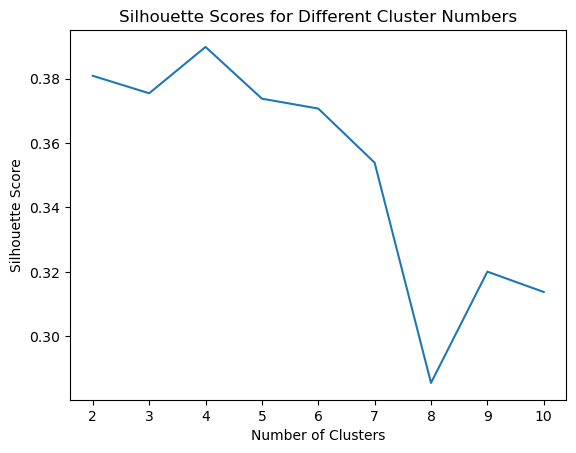

Optimal number of clusters: 4


In [34]:
from sklearn.mixture import GaussianMixture  # Import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Ensure your data is a NumPy array or similar
# For example: data = np.array(your_dataframe)

# Define possible cluster numbers to evaluate
possible_clusters = range(2, 11)  # Test cluster numbers from 2 to 10

# Initialize an empty list to store silhouette scores
scores = []

# Loop over the range of possible clusters
for n_clusters in possible_clusters:
    # Fit a Gaussian Mixture Model with the given number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    labels = gmm.fit_predict(data)  # Get cluster assignments
    # Calculate the silhouette score for the current number of clusters
    scores.append(silhouette_score(data, labels))

# Plot silhouette scores to visualize the best number of clusters
plt.plot(possible_clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_clusters = possible_clusters[scores.index(max(scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

